# CLASSIFICATION OF PROTEIN SEQUENCES (DNA/CODON/AA) USING REAL-VALUED 1D CONVOLUTIONAL NEURAL NETWORKS:
### DNA and Amino acid sequences of previously imported Kinase and GPCR protein families are converted into integer sequences by Integer coding methods. These sequences are then classified using Real-valued 1D convolutional neural networks.

## Step 1: Encoding DNA sequences into integers and classification with 1D Real convolutional networks.

## Step 2 : Encoding CODON form into integers and classification with 1D Real convolutional networks.

## Step 3 : Encoding AMİNO ACİD sequences into integers and classifying them with 1D Real convolutional networks.

# STEP 1:  (1D DNA CLASSIFICATION with Reel Valued-Convolutional NN):
### DNA sequences are encoded to integers and classified using real-valued 1D convolutional networks.

In [1]:
import pandas as pd

output_file = "D://datasetTEZ//KİNASE_GPCR_DNA_fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

      Accession                                           Sequence  label
0    lcl|M97759  ATGCTGCTGGAGACACAGGACGCGCTGTACGTGGCGCTGGAGCTGG...      0
1    lcl|U02680  ATGTCCCACCAGACCGGCATCCAAGCAAGTGAAGATGTTAAAGAGA...      1
2    lcl|X63819  ATGGAAACCAACTTCTCCACTCCTCTGAATGAATATGAAGAAGTGT...      0
3  lcl|AK222640  ATGTTTGCAGACTTGGATTATGACATCGAAGAGGATAAACTCGGAA...      1
4  lcl|AH002937  ATGTCGCTTTCTAACAAGCTGACGCTGGACAAGCTGGACGTTAAAG...      1


- Coding to integer values): The data frame in the fasta form is converted to real numbers with the integer Coding Method and saved.

In [ ]:
import pandas as pd

# Read file
file_path = "D://datasetTEZ//KİNASE_GPCR_DNA_fasta.xlsx"
data = pd.read_excel(file_path)

# Map nucleotides to numerical values
nükleotid_dict = {'T': 0, 'C': 1, 'A': 2, 'G': 3}

def encode_nükleotid_sequence(sequence):
    # Her nükleotidi eşleştirilen sayı ile değiştir
    encoded_sequence = [nükleotid_dict[n] for n in sequence]
    return encoded_sequence

# Calculate encoded version of rows
data['Encoded'] = data['Sequence'].apply(encode_nükleotid_sequence)

# Print results to .xlsx file
output_df = data[['label', 'Sequence', 'Encoded']]
output_path = "D:\\datasetTEZ\\KİNASE_GPCR_DNA_ReelEncoded.xlsx"
output_df.to_excel(output_path, index=False)


- The first five lines of the data frame, which consists of integer values in which DNA sequences are encoded:

In [2]:
import pandas as pd

output_file = "D:\\datasetTEZ\\KİNASE_GPCR_DNA_ReelEncoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   label                                           Sequence  \
0      1  ATGGCTGGTCCCTTCTCCCGTCTGCTGTCCGCCCGCCCGGGACTCA...   
1      1  ATGGCTACCTCTCGATATGAGCCAGTGGCTGAAATTGGTGTCGGTG...   
2      0  ATGGAGGAACCGGGTGCTCAGTGCGCTCCACCGCCGCCCGCGGGCT...   
3      1  ATGGCGGCGGCGGCGGCGGCGGGCGCGGGCCCGGAGATGGTCCGCG...   
4      0  ATGTCCCCACTGAACCAGTCAGCAGAAGGCCTTCCCCAGGAGGCCT...   

                                             Encoded  
0  [2, 0, 3, 3, 1, 0, 3, 3, 0, 1, 1, 1, 0, 0, 1, ...  
1  [2, 0, 3, 3, 1, 0, 2, 1, 1, 0, 1, 0, 1, 3, 2, ...  
2  [2, 0, 3, 3, 2, 3, 3, 2, 2, 1, 1, 3, 3, 3, 0, ...  
3  [2, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, ...  
4  [2, 0, 3, 0, 1, 1, 1, 1, 2, 1, 0, 3, 2, 2, 1, ...  



#### 1D Integer number sequences of DNA sequences representing kinase and GPCR proteins were classified using Real Value 1D Convolutional Neural Networks.

In [109]:
# 1D Reel Değerli Evrişimli Sinir Ağı ile Aminoasit Dizisi Sınıflandırma
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

# Veri Yükleme ve Hazırlık
# Excel dosyasından veriyi yükleyin
data_path = "D:\\datasetTEZ\\KİNASE_GPCR_DNA_ReelEncoded.xlsx"
data_df = pd.read_excel(data_path)

# Girdileri ve çıktıları ayırma
X = np.array([np.array(list(map(int, seq.strip('[]').split(',')))) for seq in data_df['Encoded']])
y = data_df['label'].values

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalizasyon için uygun şekilde yeniden boyutlandırma ve Conv1D katmanı için hazırlama
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Etiketlerin One-Hot Kodlanması
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Reel Değerli 1D Evrişimli Sinir Ağı Modeli
input_layer = Input(shape=(X_train.shape[1], 1))
conv1 = Conv1D(filters=16, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Dropout(0.2)(conv1)
conv2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = MaxPooling1D(pool_size=2)(conv2)
conv2 = Dropout(0.2)(conv2)
conv3 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv2)
conv3 = BatchNormalization()(conv3)
conv3 = MaxPooling1D(pool_size=2)(conv3)
conv3 = Dropout(0.3)(conv3)


flattened = Flatten()(conv3)

# Yoğun Katmanlar
fc1 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(flattened)
fc1 = BatchNormalization()(fc1)
fc1 = Dropout(0.3)(fc1)
fc2 = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(fc1)
fc2 = BatchNormalization()(fc2)
fc2 = Dropout(0.3)(fc2)
output_layer = Dense(2, activation='softmax')(fc2)

# Model Oluşturma ve Derleme
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback'ler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli Eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Test Seti Üzerinde Tahmin
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Performans Ölçütleri
cm = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/100
10/10 [==============================] - 5s 79ms/step - loss: 1.1999 - accuracy: 0.4938 - val_loss: 0.8149 - val_accuracy: 0.4500 - lr: 5.0000e-04
Epoch 2/100
10/10 [==============================] - 0s 24ms/step - loss: 0.9092 - accuracy: 0.6562 - val_loss: 0.8287 - val_accuracy: 0.3750 - lr: 5.0000e-04
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.8835 - accuracy: 0.6562 - val_loss: 0.8263 - val_accuracy: 0.4500 - lr: 5.0000e-04
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.7413 - accuracy: 0.7063 - val_loss: 0.8166 - val_accuracy: 0.5000 - lr: 5.0000e-04
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 0.8325 - accuracy: 0.6375 - val_loss: 0.8021 - val_accuracy: 0.6250 - lr: 2.5000e-04
Epoch 6/100
10/10 [==============================] - 0s 26ms/step - loss: 0.7103 - accuracy: 0.7063 - val_loss: 0.7915 - val_accuracy: 0.6250 - lr: 2.5000e-04
Epoch 7/100
10/10 [===========================

- (Results and Graphs)

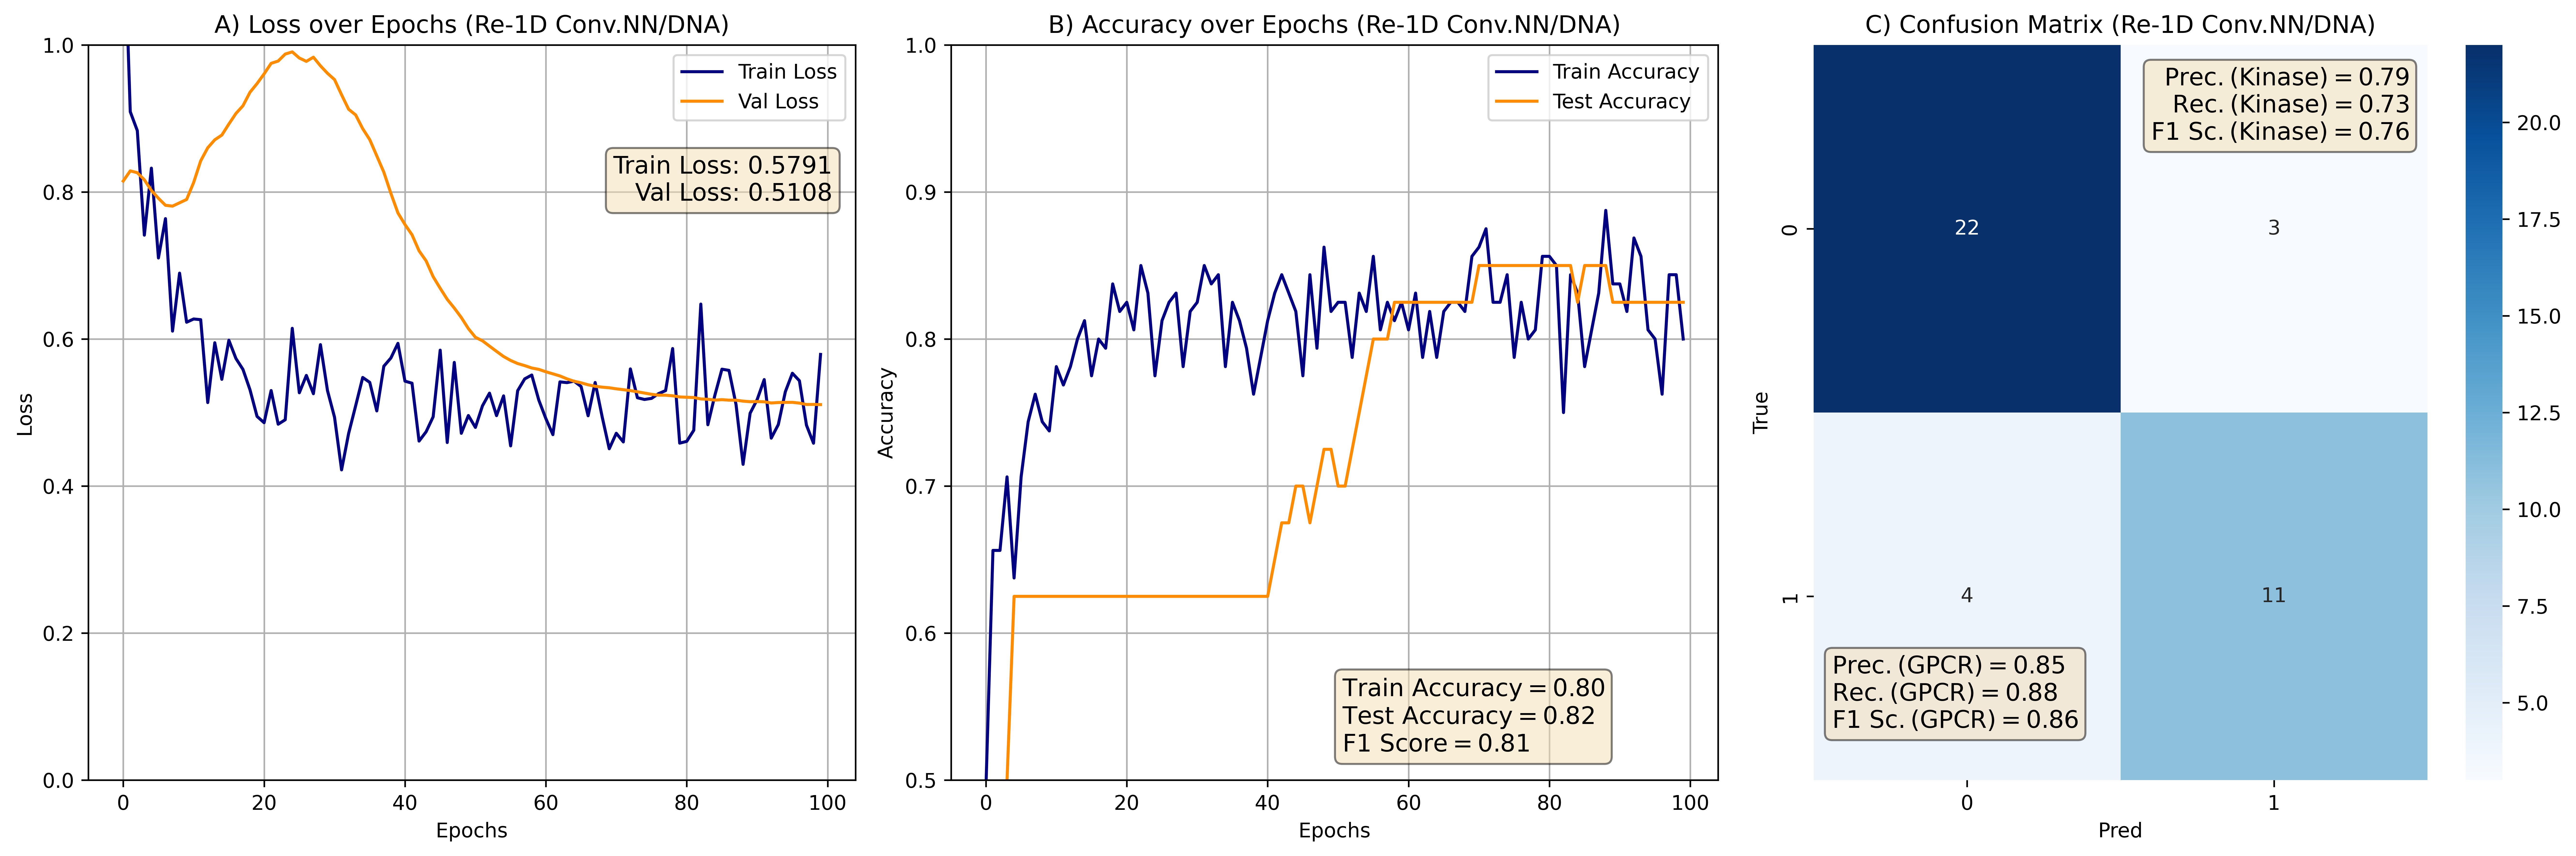

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assume y_test_classes and y_pred_classes are available as results from the model predictions
# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Assuming history object is available
# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (Re-1D Conv.NN/DNA)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (Re-1D Conv.NN/DNA)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.51, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (Re-1D Conv.NN/DNA)')

# Place text box for class A metrics in the left of confusion matrix plot
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


## STEP 2:  (1D CODON CLASSIFICATION with Reel Valued-Convolutional NN):
### CODON sequences are encoded to integers and classified using real-valued 1D convolutional networks.

- Encoding to Integer Values): The data frame in fasta form is converted to integers in triple nucleotide-codon form and saved

In [ ]:
import pandas as pd

# Read file
file_path = "D://datasetTEZ//KİNASE_GPCR_DNA_fasta.xlsx"
data = pd.read_excel(file_path)

# Map nucleotides to numerical values
kodonlar = ["TTT", "TTC", "TTA", "TTG", "TCT", "TCC", "TCA", "TCG", "TAT", "TAC", "TAA", "TAG", "TGT", "TGC", "TGA", "TGG", 
            "CTT", "CTC", "CTA", "CTG", "CCT", "CCC", "CCA", "CCG", "CAT", "CAC", "CAA", "CAG", "CGT", "CGC", "CGA", "CGG", 
            "ATT", "ATC", "ATA", "ATG", "ACT", "ACC", "ACA", "ACG", "AAT", "AAC", "AAA", "AAG", "AGT", "AGC", "AGA", "AGG", 
            "GTT", "GTC", "GTA", "GTG", "GCT", "GCC", "GCA", "GCG", "GAT", "GAC", "GAA", "GAG", "GGT", "GGC", "GGA", "GGG"]
kodon_dict = {kodon: index for index, kodon in enumerate(kodonlar)}

# step 3: Map protein sequences to integers
def encode_kodon_sequence(sequence):
    # Translate each codon by dividing 3 by 3
    return [kodon_dict[sequence[i:i+3]] for i in range(0, len(sequence), 3)]

data['Encoded'] = data['Sequence'].apply(encode_kodon_sequence)

# step 4: Print values to .xlsx file
output_df = data[['label', 'Sequence', 'Encoded']]
output_path = "D:\\datasetTEZ\\KİNASE_GPCR_Kodon_ReelEncoded.xlsx"
output_df.to_excel(output_path, index=False)

- The first five lines of the data frame, which consists of integer values in which Codon sequences are encoded:

In [9]:
import pandas as pd

output_file = "D:\\datasetTEZ\\KİNASE_GPCR_Kodon_ReelEncoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   label                                           Sequence  \
0      1  ATGGCTGGTCCCTTCTCCCGTCTGCTGTCCGCCCGCCCGGGACTCA...   
1      1  ATGGCTACCTCTCGATATGAGCCAGTGGCTGAAATTGGTGTCGGTG...   
2      0  ATGGAGGAACCGGGTGCTCAGTGCGCTCCACCGCCGCCCGCGGGCT...   
3      1  ATGGCGGCGGCGGCGGCGGCGGGCGCGGGCCCGGAGATGGTCCGCG...   
4      0  ATGTCCCCACTGAACCAGTCAGCAGAAGGCCTTCCCCAGGAGGCCT...   

                                             Encoded  
0  [35, 52, 60, 21, 1, 5, 28, 19, 19, 5, 53, 29, ...  
1  [35, 52, 37, 4, 30, 8, 59, 22, 51, 52, 58, 32,...  
2  [35, 59, 58, 23, 60, 52, 27, 13, 52, 22, 23, 2...  
3  [35, 55, 55, 55, 55, 55, 55, 61, 55, 61, 23, 5...  
4  [35, 5, 22, 19, 41, 27, 6, 54, 58, 61, 16, 21,...  



#### 1D Integer number sequences of CODON sequences representing kinase and GPCR proteins were classified using Real Value 1D Convolutional Neural Networks.

In [124]:
# 1D Reel Değerli Evrişimli Sinir Ağı ile Aminoasit Dizisi Sınıflandırma
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

# Veri Yükleme ve Hazırlık
# Excel dosyasından veriyi yükleyin
data_path = "D:\\datasetTEZ\\KİNASE_GPCR_Kodon_ReelEncoded.xlsx"
data_df = pd.read_excel(data_path)

# Girdileri ve çıktıları ayırma
X = np.array([np.array(list(map(int, seq.strip('[]').split(',')))) for seq in data_df['Encoded']])
y = data_df['label'].values

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalizasyon için uygun şekilde yeniden boyutlandırma ve Conv1D katmanı için hazırlama
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Etiketlerin One-Hot Kodlanması
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Reel Değerli 1D Evrişimli Sinir Ağı Modeli
input_layer = Input(shape=(X_train.shape[1], 1))
conv1 = Conv1D(filters=16, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Dropout(0.2)(conv1)
conv2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = MaxPooling1D(pool_size=2)(conv2)
conv2 = Dropout(0.2)(conv2)
conv3 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv2)
conv3 = BatchNormalization()(conv3)
conv3 = MaxPooling1D(pool_size=2)(conv3)
conv3 = Dropout(0.3)(conv3)


flattened = Flatten()(conv3)

# Yoğun Katmanlar
fc1 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(flattened)
fc1 = BatchNormalization()(fc1)
fc1 = Dropout(0.3)(fc1)
fc2 = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(fc1)
fc2 = BatchNormalization()(fc2)
fc2 = Dropout(0.3)(fc2)
output_layer = Dense(2, activation='softmax')(fc2)

# Model Oluşturma ve Derleme
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback'ler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli Eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Test Seti Üzerinde Tahmin
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Performans Ölçütleri
cm = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/100
10/10 [==============================] - 5s 75ms/step - loss: 1.0491 - accuracy: 0.5750 - val_loss: 0.8578 - val_accuracy: 0.3750 - lr: 5.0000e-04
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 1.0185 - accuracy: 0.6125 - val_loss: 0.8535 - val_accuracy: 0.3750 - lr: 5.0000e-04
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.9180 - accuracy: 0.6062 - val_loss: 0.8410 - val_accuracy: 0.3750 - lr: 5.0000e-04
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.8905 - accuracy: 0.6125 - val_loss: 0.8233 - val_accuracy: 0.4500 - lr: 5.0000e-04
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6943 - accuracy: 0.7063 - val_loss: 0.8068 - val_accuracy: 0.5750 - lr: 5.0000e-04
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.7442 - accuracy: 0.7375 - val_loss: 0.7899 - val_accuracy: 0.6500 - lr: 5.0000e-04
Epoch 7/100
10/10 [===========================

- (Results and Graphs)

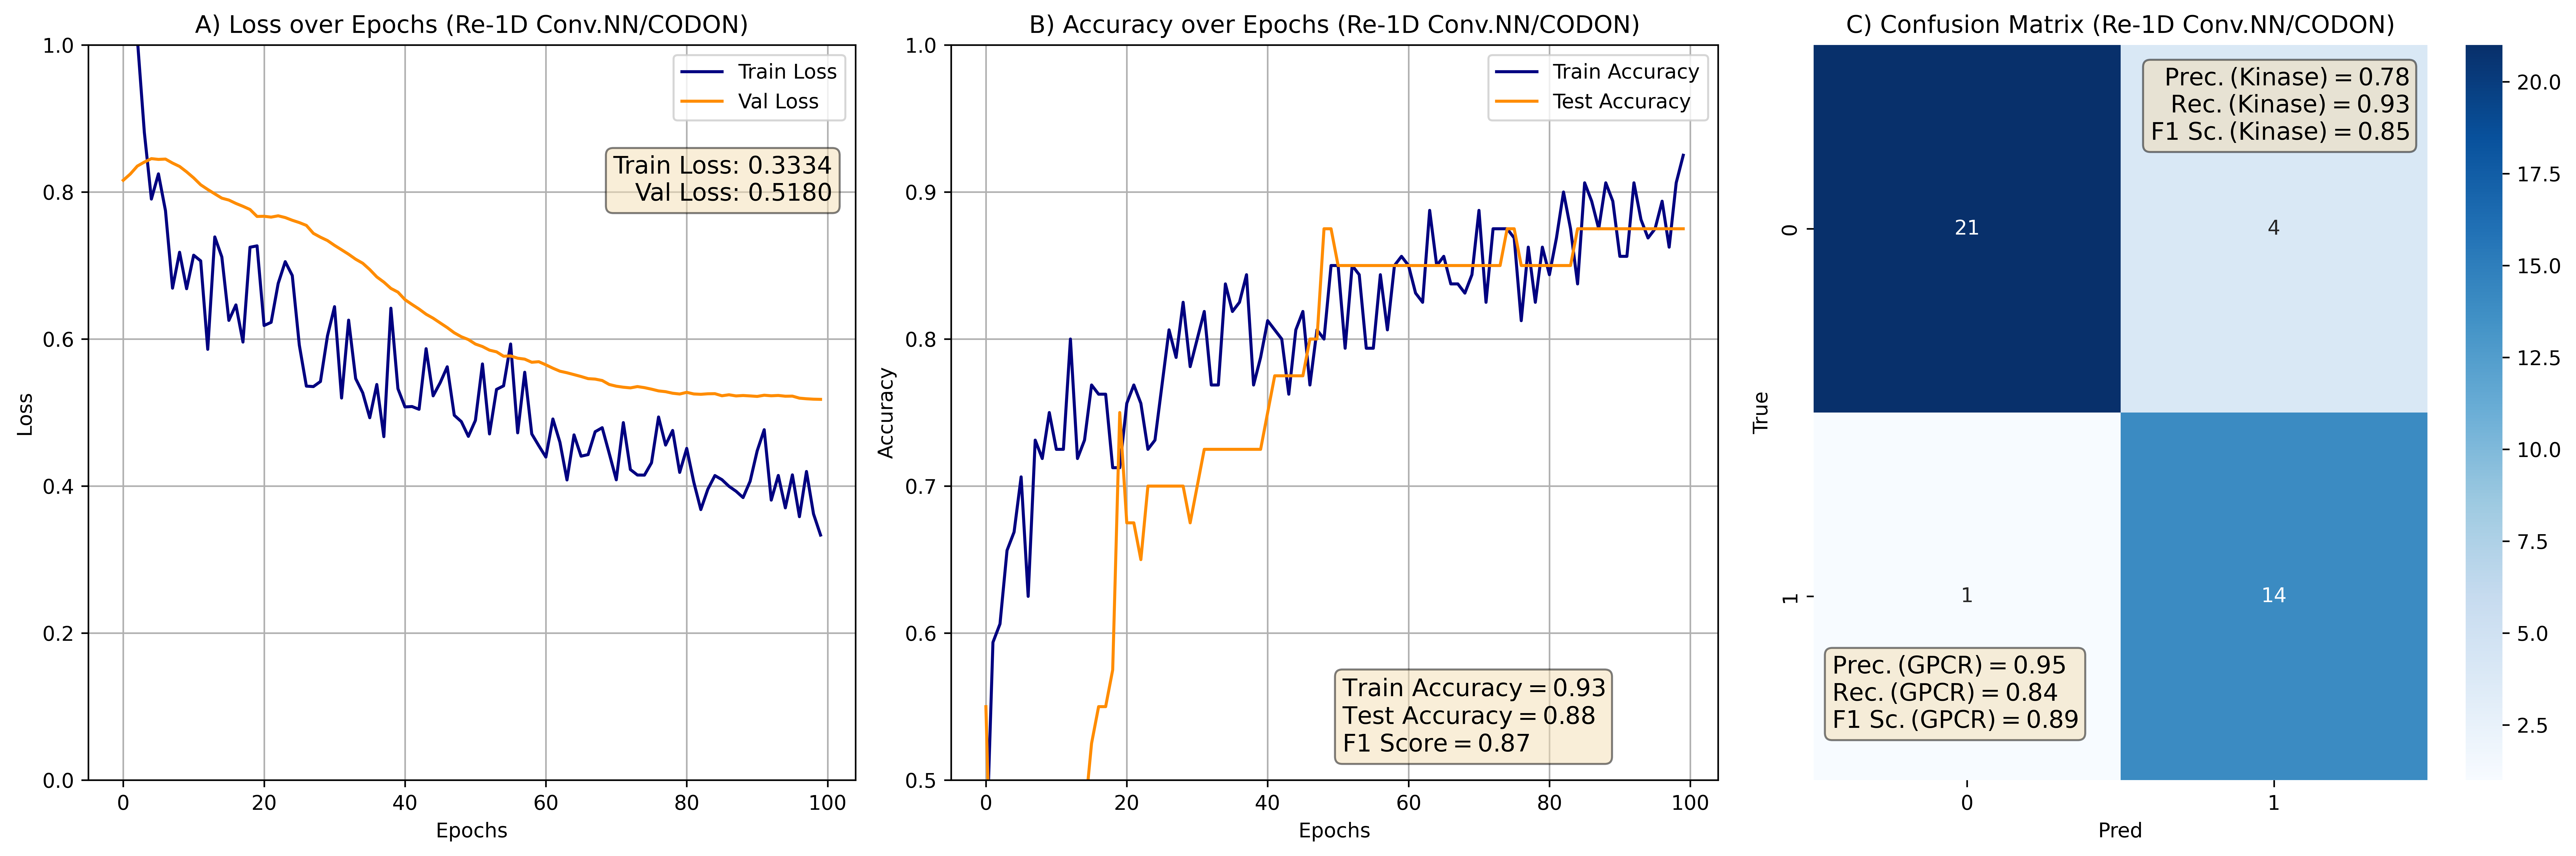

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assume y_test_classes and y_pred_classes are available as results from the model predictions
# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Assuming history object is available
# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (Re-1D Conv.NN/CODON)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (Re-1D Conv.NN/CODON)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.51, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (Re-1D Conv.NN/CODON)')

# Place text box for class A metrics in the left of confusion matrix plot
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


## STEP 3:  (1D AMİNOACİD CLASSIFICATION with Reel Valued-Convolutional NN):
#### 1D Integer number sequences of amino acid sequences representing kinase and GPCR proteins were classified using Real Value 1D Convolutional Neural Networks.

In [12]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence  label
0  CAA40491.1  MLEPLPCWDAAKDLKEPQCPPGDRVGVQPGNSRVWQGTMEKAGLAW...      1
1  AAA16617.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...      0
2  AAA36449.1  MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTG...      1
3  AAA35535.1  MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...      0
4  CAA54031.1  MAQRQPHSPNQTLISITNDTESSSSVVSNDNTNKGWSGDNSPGIEA...      0


- Amino acid sequences in fasta form are converted to Integers with the Integer Coding Method and recorded as a Real-valued data frame.

In [ ]:
import pandas as pd
import numpy as np

# Read file
file_path = "D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx"
data = pd.read_excel(file_path)

# Map amino acids to integers from 1 to 20
amino_acids = 'FLSYCWPHQRIMTNKVADEG'
amino_dict = {aa: i for i, aa in enumerate(amino_acids, 1)}

# Map protein sequences to integers
def encode_sequence(sequence):
    encoded = [amino_dict[aa] for aa in sequence]
    return encoded

data['Encoded'] = data['Sequence'].apply(encode_sequence)

# Save values to .xlsx file
output_df = data[['label', 'Sequence', 'Encoded']]
output_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_AminoAcid_EncodedReel.xlsx", index=False)


- The first five lines of the data frame, which consists of integer values in which amino acid sequences are encoded:

In [13]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_AminoAcid_EncodedReel.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   label                                           Sequence  \
0      1  MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTG...   
1      1  MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTG...   
2      0  MSPLNQSAEGLPQEASNRSLNATETSEAWDPRTLQALKISLAVVLS...   
3      1  MSHQTGIQASEDVKEIFARARNGKYRLLKISIENEQLVIGSYSQPS...   
4      1  MAGVFDIDLDQPEDAGSEDELEEGGQLNESMDHGGVGPYELGMEHC...   

                                             Encoded  
0  [12, 3, 15, 7, 8, 3, 19, 17, 20, 13, 17, 1, 11...  
1  [12, 3, 15, 7, 8, 3, 19, 17, 20, 13, 17, 1, 11...  
2  [12, 3, 7, 2, 14, 9, 3, 17, 19, 20, 2, 7, 9, 1...  
3  [12, 3, 8, 9, 13, 20, 11, 9, 17, 3, 19, 18, 16...  
4  [12, 17, 20, 16, 1, 18, 11, 18, 2, 18, 9, 7, 1...  


- 1D Integer number sequences of amino acid sequences representing kinase and GPCR proteins were classified using Real Value 1D Convolutional Neural Networks.

In [137]:
# 1D Reel Değerli Evrişimli Sinir Ağı ile Aminoasit Dizisi Sınıflandırma
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

# Veri Yükleme ve Hazırlık
# Excel dosyasından veriyi yükleyin
data_path = "D:\datasetTEZ\KİNASE_GPCR_AminoAcid_EncodedReel.xlsx"
data_df = pd.read_excel(data_path)

# Girdileri ve çıktıları ayırma
X = np.array([np.array(list(map(int, seq.strip('[]').split(',')))) for seq in data_df['Encoded']])
y = data_df['label'].values

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalizasyon için uygun şekilde yeniden boyutlandırma ve Conv1D katmanı için hazırlama
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Etiketlerin One-Hot Kodlanması
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Reel Değerli 1D Evrişimli Sinir Ağı Modeli
input_layer = Input(shape=(X_train.shape[1], 1))
conv1 = Conv1D(filters=16, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Dropout(0.2)(conv1)
conv2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = MaxPooling1D(pool_size=2)(conv2)
conv2 = Dropout(0.2)(conv2)
conv3 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(conv2)
conv3 = BatchNormalization()(conv3)
conv3 = MaxPooling1D(pool_size=2)(conv3)
conv3 = Dropout(0.3)(conv3)


flattened = Flatten()(conv3)

# Yoğun Katmanlar
fc1 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(flattened)
fc1 = BatchNormalization()(fc1)
fc1 = Dropout(0.3)(fc1)
fc2 = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(fc1)
fc2 = BatchNormalization()(fc2)
fc2 = Dropout(0.3)(fc2)
output_layer = Dense(2, activation='softmax')(fc2)

# Model Oluşturma ve Derleme
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback'ler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli Eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Test Seti Üzerinde Tahmin
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Performans Ölçütleri
cm = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/100
10/10 [==============================] - 5s 71ms/step - loss: 1.1091 - accuracy: 0.4812 - val_loss: 0.8165 - val_accuracy: 0.4250 - lr: 5.0000e-04
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.9121 - accuracy: 0.5437 - val_loss: 0.8102 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.8330 - accuracy: 0.6313 - val_loss: 0.8044 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.8182 - accuracy: 0.6438 - val_loss: 0.8002 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7291 - accuracy: 0.6625 - val_loss: 0.7990 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7670 - accuracy: 0.7063 - val_loss: 0.7976 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 7/100
10/10 [===========================

- (Results and Graphs)

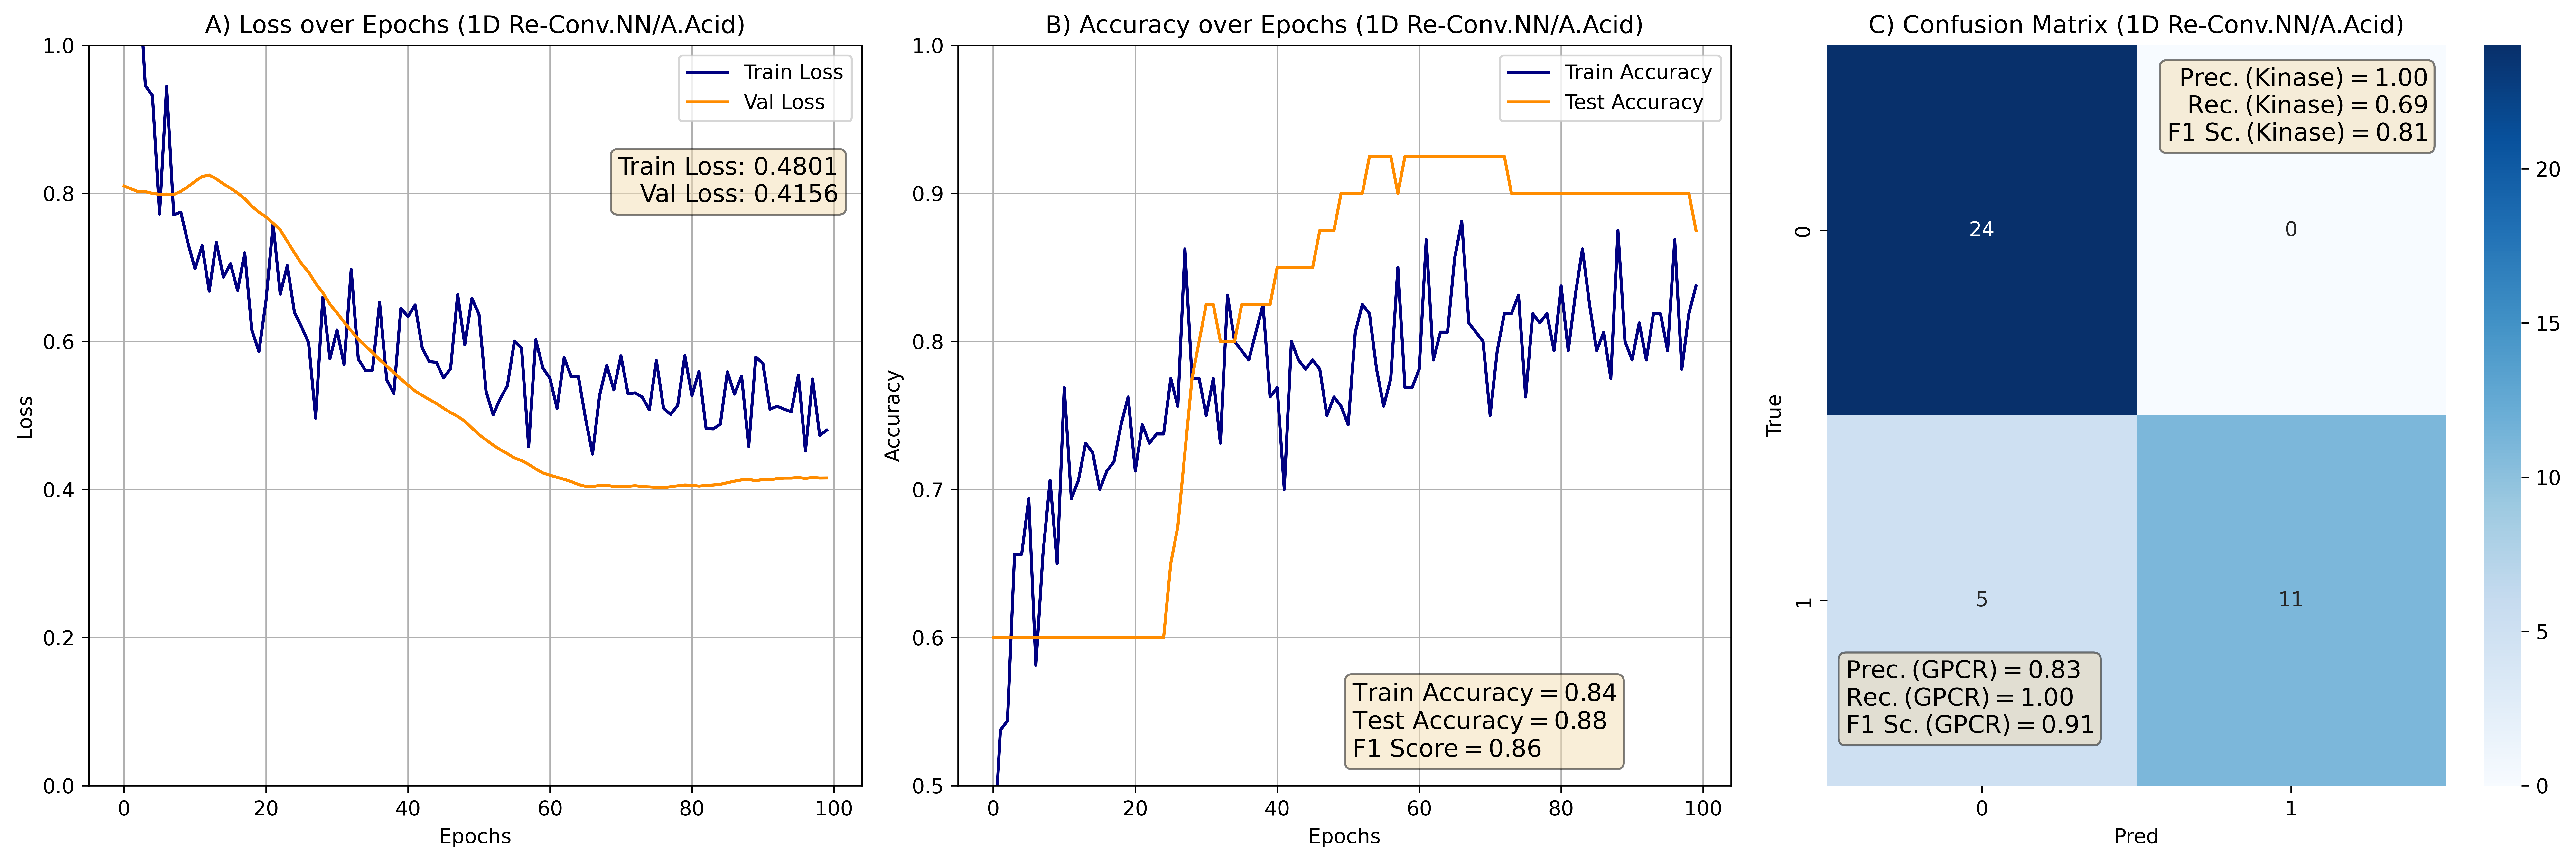

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assume y_test_classes and y_pred_classes are available as results from the model predictions
# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Assuming history object is available
# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (Re-1D Conv.NN/A.Acid)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (Re-1D Conv.NN/A.Acid)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.51, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (Re-1D Conv.NN/A.Acid)')

# Place text box for class A metrics in the left of confusion matrix plot
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()
